In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
plt.style.use('ggplot')

In [3]:
dn = pd.read_csv('/content/netflix_reviews.csv')

In [98]:
print(dn.shape)
dn = dn.head(1500)
print(dn.shape)

(113607, 4)
(1500, 4)


In [100]:
dn['content'].values[998]

'Great audio and video'

In [6]:
#Dropping some columns
columns_to_drop = ['thumbsUpCount',	'reviewCreatedVersion',	'at',	'appVersion']
dn = dn.drop(columns=columns_to_drop)

In [7]:
dn

,reviewId,userName,content,score
0,b3d27852-9a3b-4f74-9e16-15434d3ee324,Karen Gulli,Good,3
1,8be10073-2368-4677-b828-9ff5d06ea0b7,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1
2,9ac001b4-a47e-4aba-981f-4679345a9664,Hushikesh Suvakiya,Always promoting anti-Hindu shows.,1
3,abcc5ae3-c4e7-4a4d-b9c2-6d289cac70bc,Mann Official,No I'm not able to remove this app anymore 0 o...,1
4,b0687627-7eb4-4c74-ac88-ba3cef068484,ashutosh gokani,Thy are supporting maharaj movie ...thts not a...,1
...,...,...,...,...
113602,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5
113603,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5
113604,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1
113605,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1


EDA

In [101]:
dn['score'].value_counts()

score
1    660
5    558
2    101
4     95
3     86
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Reviews')

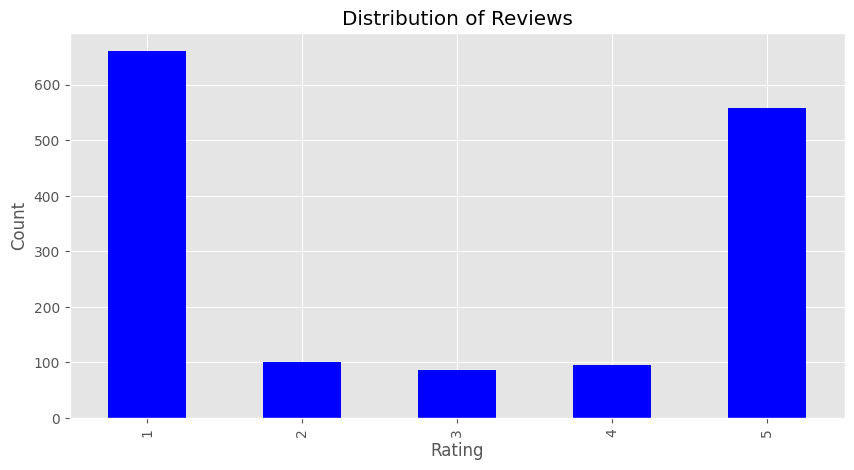

In [102]:
dn['score'].value_counts().sort_index().plot(kind='bar',color="blue", figsize=(10,5))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Reviews')

In [ ]:
#dn['content'] = dn['content'].str.lower()

Basic NLTK

In [103]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [105]:
example= dn['content'][501]
example

'Good not even good it was delight full but i wish they would bring back teen wolf'

In [106]:
tokens = nltk.word_tokenize(example)
tokens

['Good',
 'not',
 'even',
 'good',
 'it',
 'was',
 'delight',
 'full',
 'but',
 'i',
 'wish',
 'they',
 'would',
 'bring',
 'back',
 'teen',
 'wolf']

In [107]:
tagged = nltk.pos_tag(tokens)
tagged

[('Good', 'JJ'),
 ('not', 'RB'),
 ('even', 'RB'),
 ('good', 'JJ'),
 ('it', 'PRP'),
 ('was', 'VBD'),
 ('delight', 'VBN'),
 ('full', 'JJ'),
 ('but', 'CC'),
 ('i', 'JJ'),
 ('wish', 'NN'),
 ('they', 'PRP'),
 ('would', 'MD'),
 ('bring', 'VB'),
 ('back', 'RB'),
 ('teen', 'JJ'),
 ('wolf', 'NN')]

In [108]:
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

In [109]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [110]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Good/JJ
  not/RB
  even/RB
  good/JJ
  it/PRP
  was/VBD
  delight/VBN
  full/JJ
  but/CC
  i/JJ
  wish/NN
  they/PRP
  would/MD
  bring/VB
  back/RB
  teen/JJ
  wolf/NN)


###VADER (Valence Aware Dictionary and sEntiment Reasoner)
Sentiment intensity Analyzer

In [111]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [112]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sis = SentimentIntensityAnalyzer()

In [47]:
sis

In [113]:
#Example with result consisting of negative, neutral, positive and a compound values of the statement
sis.polarity_scores('I am so depressed')

{'neg': 0.642, 'neu': 0.358, 'pos': 0.0, 'compound': -0.5563}

In [114]:
sis.polarity_scores(example)

{'neg': 0.079, 'neu': 0.554, 'pos': 0.367, 'compound': 0.7389}

In [115]:
#Polarity score on the entire dataset
res = {}
for i, row in tqdm(dn.iterrows(), total=len(dn)): # unpack the tuple into index and row
    content = row['content']
    reviewId = row['reviewId']
    score = row['score']
    # Check if content is a valid string before processing
    if isinstance(content, str):
        res[reviewId] = sis.polarity_scores(content)
    else:
        # Handle NaN or non-string values as needed
        res[reviewId] = {'neg': None, 'neu': None, 'pos': None, 'compound': None}

  0%|          | 0/1500 [00:00<?, ?it/s]

In [116]:
res

{'b3d27852-9a3b-4f74-9e16-15434d3ee324': {'neg': 0.0,
  'neu': 0.0,
  'pos': 1.0,
  'compound': 0.4404},
 '8be10073-2368-4677-b828-9ff5d06ea0b7': {'neg': 0.075,
  'neu': 0.749,
  'pos': 0.176,
  'compound': 0.4215},
 '9ac001b4-a47e-4aba-981f-4679345a9664': {'neg': 0.0,
  'neu': 0.545,
  'pos': 0.455,
  'compound': 0.3612},
 'abcc5ae3-c4e7-4a4d-b9c2-6d289cac70bc': {'neg': 0.1,
  'neu': 0.818,
  'pos': 0.082,
  'compound': -0.1027},
 'b0687627-7eb4-4c74-ac88-ba3cef068484': {'neg': 0.181,
  'neu': 0.552,
  'pos': 0.267,
  'compound': 0.2354},
 '20c8da91-5ec1-4a76-8985-17363c0623f5': {'neg': 0.351,
  'neu': 0.649,
  'pos': 0.0,
  'compound': -0.4019},
 '1980811f-af25-409a-b66e-a20cc17d8baf': {'neg': 0.0,
  'neu': 0.691,
  'pos': 0.309,
  'compound': 0.6908},
 '926de944-4768-43fd-93d5-45e7793a37fa': {'neg': 0.0,
  'neu': 0.0,
  'pos': 1.0,
  'compound': 0.296},
 '5f5e5259-2925-4126-b25f-9da325f401f5': {'neg': 0.219,
  'neu': 0.631,
  'pos': 0.15,
  'compound': -0.6344},
 'ea20ac88-b025-4591

In [119]:
#Storing it into a pandas df
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'reviewId'})
vaders = vaders.merge(dn, how='left')

In [121]:
vaders.head()

,reviewId,neg,neu,pos,compound,userName,content,score
0,b3d27852-9a3b-4f74-9e16-15434d3ee324,0.000,0.000,1.000,0.4404,Karen Gulli,Good,3
1,8be10073-2368-4677-b828-9ff5d06ea0b7,0.075,0.749,0.176,0.4215,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1
2,9ac001b4-a47e-4aba-981f-4679345a9664,0.000,0.545,0.455,0.3612,Hushikesh Suvakiya,Always promoting anti-Hindu shows.,1
3,abcc5ae3-c4e7-4a4d-b9c2-6d289cac70bc,0.100,0.818,0.082,-0.1027,Mann Official,No I'm not able to remove this app anymore 0 o...,1
4,b0687627-7eb4-4c74-ac88-ba3cef068484,0.181,0.552,0.267,0.2354,ashutosh gokani,Thy are supporting maharaj movie ...thts not a...,1


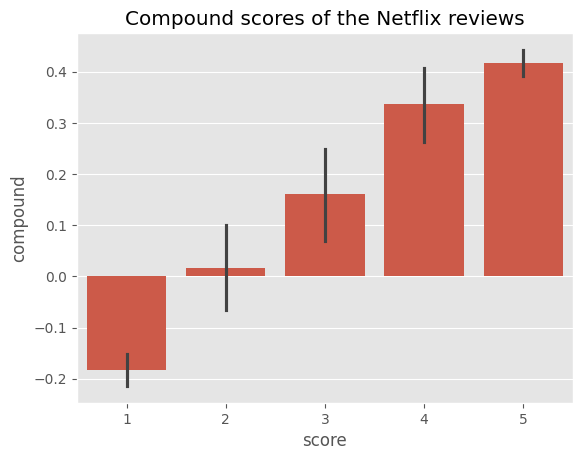

In [124]:
ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compound scores of the Netflix reviews')
plt.show()

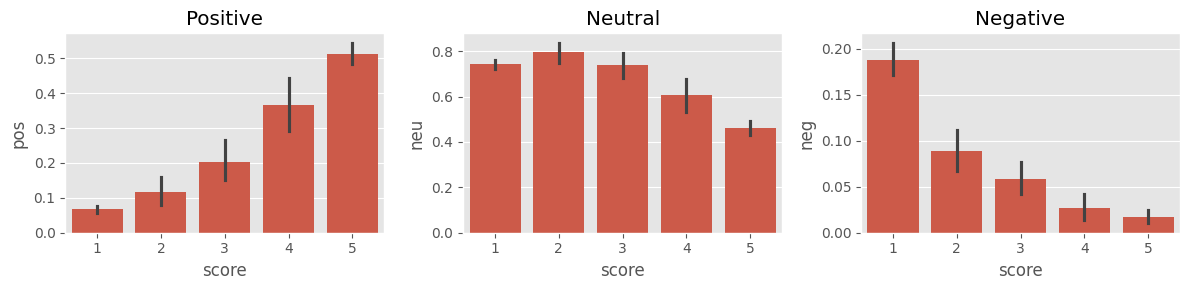

In [127]:
#Relations between each sentiment
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### Roberta Pretrained Model

In [128]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [130]:
#Pre-trained model with trained weights which can be directly applied on our data
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [132]:
#VADER results
print(example)
sis.polarity_scores(example)

Good not even good it was delight full but i wish they would bring back teen wolf


{'neg': 0.079, 'neu': 0.554, 'pos': 0.367, 'compound': 0.7389}

In [139]:
#Run for Roberta model
#tokenizer.encode(example)
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.47017628, 'roberta_neu': 0.38042068, 'roberta_pos': 0.14940298}


In [141]:
#Defining the function of Roberta
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
  }
  return scores_dict

In [146]:
res = {}
for i, row in tqdm(dn.iterrows(), total=len(dn)): # unpack the tuple into index and row
    content = row['content']
    reviewId = row['reviewId']
    score = row['score']
    # Check if content is a valid string before processing
    if isinstance(content, str):
        vader_results = sis.polarity_scores(content)
    else:
        # Handle NaN or non-string values as needed
        vader_results = {'neg': None, 'neu': None, 'pos': None, 'compound': None}
    roberta_results = polarity_scores_roberta(content)
    both = {**vader_results, **roberta_results}
    res[reviewId] = both

  0%|          | 0/1500 [00:00<?, ?it/s]

In [147]:
both

{'neg': 0.346,
 'neu': 0.256,
 'pos': 0.397,
 'compound': -0.1531,
 'roberta_neg': 0.30644074,
 'roberta_neu': 0.57127154,
 'roberta_pos': 0.122287735}

In [148]:
results_dn = pd.DataFrame(res).T
results_dn = results_dn.reset_index().rename(columns={'index': 'reviewId'})
results_dn = results_dn.merge(dn, how='left')

In [149]:
results_dn.head()
#Here neg, neu, pos & compound are the results from VADER Model

,reviewId,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,userName,content,score
0,b3d27852-9a3b-4f74-9e16-15434d3ee324,0.000,0.000,1.000,0.4404,0.060793,0.329428,0.609779,Karen Gulli,Good,3
1,8be10073-2368-4677-b828-9ff5d06ea0b7,0.075,0.749,0.176,0.4215,0.300160,0.486132,0.213707,Ronny Magadi,"App is useful to certain phone brand ,,,,it is...",1
2,9ac001b4-a47e-4aba-981f-4679345a9664,0.000,0.545,0.455,0.3612,0.768485,0.222717,0.008798,Hushikesh Suvakiya,Always promoting anti-Hindu shows.,1
3,abcc5ae3-c4e7-4a4d-b9c2-6d289cac70bc,0.100,0.818,0.082,-0.1027,0.840778,0.148579,0.010642,Mann Official,No I'm not able to remove this app anymore 0 o...,1
4,b0687627-7eb4-4c74-ac88-ba3cef068484,0.181,0.552,0.267,0.2354,0.899037,0.095368,0.005595,ashutosh gokani,Thy are supporting maharaj movie ...thts not a...,1


## Compare scores between Models

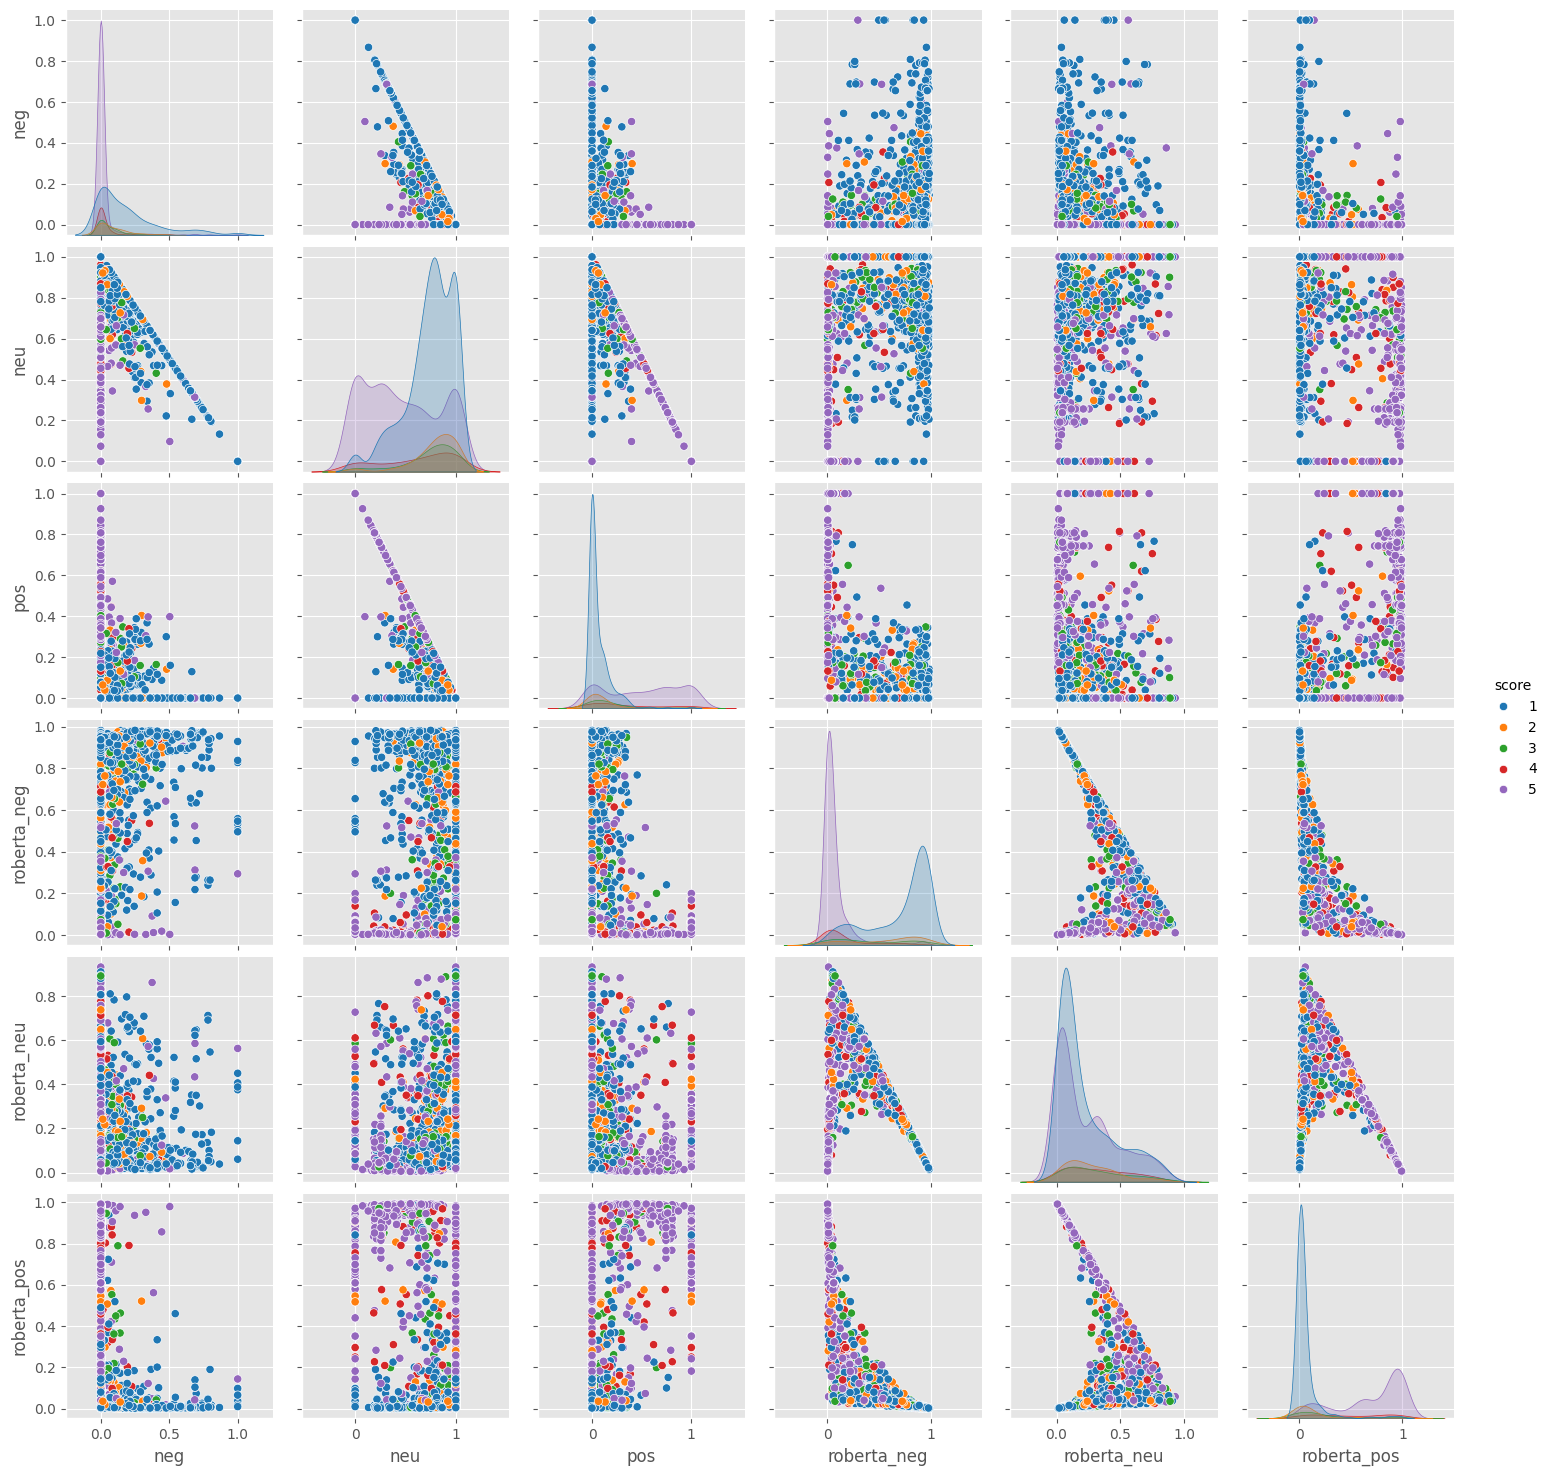

In [150]:
#Comparision between VADER Model and Roberta Model
sns.pairplot(data = results_dn, vars = ['neg',	'neu',	'pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'], hue = 'score', palette = 'tab10')
plt.show()

### Review Examples

Positive 1-star and Negative 5-star reviews

Here the review is positive but the rating is less

In [151]:
results_dn.query('score == 1').sort_values('roberta_pos', ascending=False)['content'].values[0]

'Just began using it and it is very awesome'

In [153]:
results_dn.query('score == 1').sort_values('pos', ascending=False)['content'].values[0]

'V good'

Here the review is negative but the rating is high

In [155]:
results_dn.query('score == 5').sort_values('roberta_neg', ascending=False)['content'].values[7]

"100% not watching any of movie I cannot found what's real Apps of the Netflix...."

In [161]:
results_dn.query('score == 5').sort_values('neg', ascending=False)['content'].values[1]

'Very bad'

#Transformers Pipeline
from Huggingface

In [162]:
from transformers import pipeline

In [163]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [164]:
sent_pipeline('I hate you')

[{'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [166]:
example

'Good not even good it was delight full but i wish they would bring back teen wolf'

In [167]:
sent_pipeline(example)

[{'label': 'POSITIVE', 'score': 0.9349214434623718}]

In [175]:
# Extract the text column you want to analyze from the DataFrame
texts = results_dn['content'].tolist()

# Pass the list of texts to the sentiment analysis pipeline
results = sent_pipeline(texts)

# Print or process the results
print(results)

[{'label': 'POSITIVE', 'score': 0.9998161196708679}, {'label': 'NEGATIVE', 'score': 0.9964234232902527}, {'label': 'NEGATIVE', 'score': 0.9134244322776794}, {'label': 'NEGATIVE', 'score': 0.9950566291809082}, {'label': 'NEGATIVE', 'score': 0.999772846698761}, {'label': 'NEGATIVE', 'score': 0.9995673298835754}, {'label': 'NEGATIVE', 'score': 0.8182899951934814}, {'label': 'POSITIVE', 'score': 0.9997851252555847}, {'label': 'NEGATIVE', 'score': 0.9998278617858887}, {'label': 'NEGATIVE', 'score': 0.9997115731239319}, {'label': 'NEGATIVE', 'score': 0.5405042171478271}, {'label': 'POSITIVE', 'score': 0.9983693957328796}, {'label': 'NEGATIVE', 'score': 0.9994722008705139}, {'label': 'NEGATIVE', 'score': 0.9981487989425659}, {'label': 'NEGATIVE', 'score': 0.9929627776145935}, {'label': 'NEGATIVE', 'score': 0.9990430474281311}, {'label': 'NEGATIVE', 'score': 0.9995787739753723}, {'label': 'NEGATIVE', 'score': 0.9996656179428101}, {'label': 'POSITIVE', 'score': 0.9998424053192139}, {'label': 'N

In [180]:
texts = texts[:10]
results = results[:10]
for i, (text, sentiment) in enumerate(zip(texts, results)):
    print(f"Text {i+1}:")
    print(text)
    print("Sentiment Scores:")
    for k, v in sentiment.items():
        print(f"  {k}: {v}")
    print()

Text 1:
Good
Sentiment Scores:
  label: POSITIVE
  score: 0.9998161196708679

Text 2:
App is useful to certain phone brand ,,,,it is not excepted to all the phone ,,,,I have tried so many phone to use but no results yet to be determined by me
Sentiment Scores:
  label: NEGATIVE
  score: 0.9964234232902527

Text 3:
Always promoting anti-Hindu shows.
Sentiment Scores:
  label: NEGATIVE
  score: 0.9134244322776794

Text 4:
No I'm not able to remove this app anymore 0 out of 5 On top it forces u to review or u can't review
Sentiment Scores:
  label: NEGATIVE
  score: 0.9950566291809082

Text 5:
Thy are supporting maharaj movie ...thts not acceptable
Sentiment Scores:
  label: NEGATIVE
  score: 0.999772846698761

Text 6:
Boycotting Netflix to Air Maharaj movie.
Sentiment Scores:
  label: NEGATIVE
  score: 0.9995673298835754

Text 7:
I love cause it has what i want go Netflix but where's the originals and legacies please put it soon
Sentiment Scores:
  label: NEGATIVE
  score: 0.818289995193